<a href="https://colab.research.google.com/github/dongwon0002/DataMininig_term/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 원본 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df_apt = pd.read_csv('/content/drive/MyDrive/DataMining/term project/data/OG/아파트(전월세)_실거래가_20250522185247.csv',encoding="cp949", header=15)
df_vil = pd.read_csv('/content/drive/MyDrive/DataMining/term project/data/OG/연립다세대(전월세)_실거래가_20250522185244.csv',encoding="cp949", header=15)

## 원본 데이터

| 시군구               | 번지   | 본번 | 부번 | 전월세구분 | 전용면적(㎡) | 계약년월 | 계약일 | 보증금(만원) | 월세금(만원) | 층  | 건축년도 | 도로명                          | 계약기간         | 계약구분 | 갱신요구권 사용 | 주택유형 | 건물명           |
|----------------------|--------|------|------|------------|--------------|----------|--------|---------------|---------------|------|----------|-----------------------------------|------------------|----------|------------------|----------|------------------|
| 서울특별시 광진구 광장동 | 554-7 | 554  | 7    | 전세       | 84.53        | 202412   | 31     | 74,000        | 0             | 7    | 1989     | 서울특별시 광진구 광장동554-7    | 202504~202704    | 신규     | -                | 아파트   | 현대5            |
| 서울특별시 광진구 광장동 | 218-1 | 218  | 1    | 전세       | 75.55        | 202412   | 31     | 54,000        | 0             | 8    | 1989     | 서울특별시 광진구 광장동218-1    | 202502~202702    | 신규     | -                | 아파트   | 극동2            |
| 서울특별시 성동구 금호동2가 | 1      | 1    | 0    | 월세       | 84.98        | 202412   | 31     | 75,000        | 80            | 12   | 2016     | 서울특별시 성동구 금호동2가1     | 202502~202702    | 신규     | -                | 아파트   | 신금호파크자이    |
| 서울특별시 성동구 행당동   | 375    | 375  | 0    | 전세       | 59.99        | 202412   | 31     | 70,000        | 0             | 6    | 2009     | 서울특별시 성동구 행당동375      | 202503~202703    | 신규     | -                | 아파트   | 행당두산위브      |
| 서울특별시 성동구 행당동   | 380    | 380  | 0    | 월세       | 84.90        | 202412   | 31     | 70,000        | 120           | 22   | 2018     | 서울특별시 성동구 행당동380      | 202502~202702    | 신규     | -                | 아파트   | 서울숲리버뷰자이  |


### - ```계약구분```,```갱신요구권 사용```삭제,
### - ```시군구``` -> ```시```,```군```,```구```로 나누기
### - ```보증금(만원)```,```월세금(만원)``` => 컴마 삭제하고 int type으로 변환
### - ```계약년월``` -> ```계약년```,```계약월```
### - ```계약기간``` -> 개월수로 교체 -> 120이상이면 공공임대 주택으로 예상하고 행 제거
### - ```계약기간``` 이 '-'로 채워진 경우 삭제
### - ```계약년```보다 ```계약시작연```이 큰 경우, 행 제거
### - ```전월세구분``` == '월세'가 아니면 삭제
### - 120개월 미만의 계약만 유지
### - ```월세/면적```컬럼 생성, ```보증금/월세```컬럼 생성

### 자기자본으로 보증금을 마련하는 경우 (기회비용)
$$[
\text{월 부담액} = \left( \frac{\text{보증금} \times \text{연 이자율}}{12} \right) + \text{월세}
]$$
### 대출로 보증금을 마련하는 경우 (대출이자만) => 원금상환은 제외
$$[
\text{월 부담액} = \left( \frac{\text{보증금} \times 0.7 \times \text{연 대출금리}}{12} \right) + \text{월세}
]$$

\
### 투기 과열 지구, 전월세 자금 대출 이외 본인 신용대출 등의 다양항 대출존재
### 대출 종류 별로 다르기 때문에 기회비용 측면의 월부담액으로 고정

-------------


### 월세금 분포가 넓지만 기사를 통해 실제 존재하는 거래임을 확인

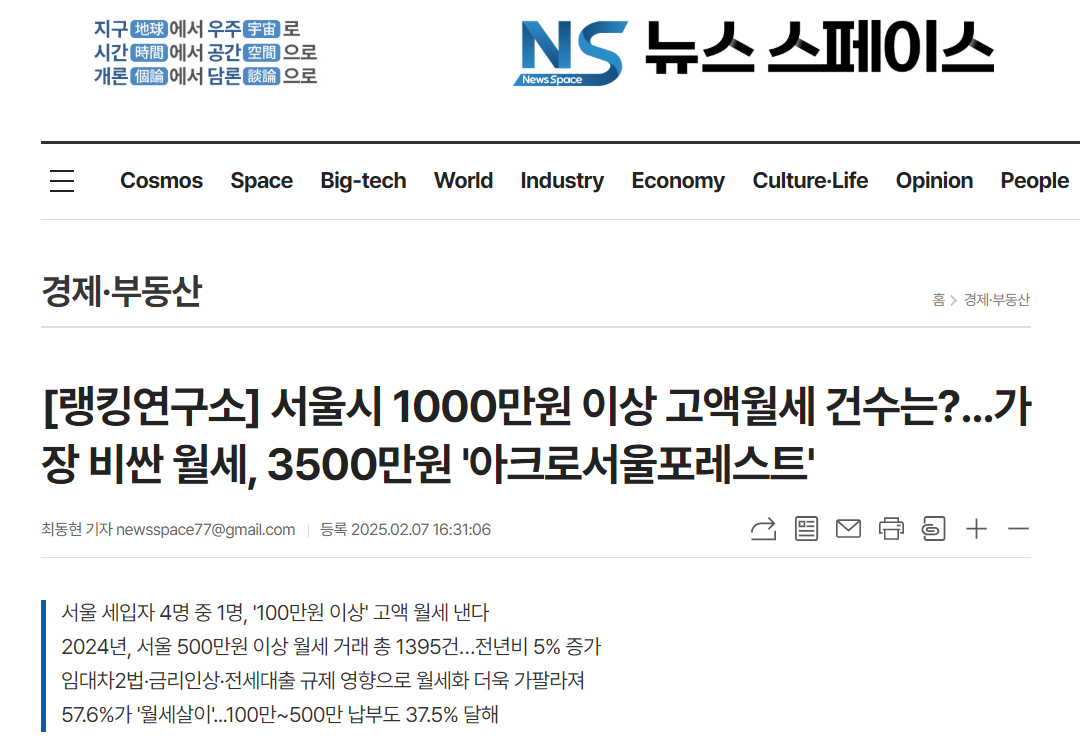

### 공공임대주택, 민간 공공임대주택, 행복주택, 청년주택등의 매물은 이상치라 판단가능하여 여러 방법으로 필터링 할 수 있는 방법을 모색하였지만 명확한 구분이 어렵고 이후 모델의 성능을 확인하고 추가하는 것으로

1. 임대주택에 대해서 계약기간이 길 것이라는 전제로 특정 계약기간을 기준으로 월세금의 평균을 비교하여 전후 평균의 차이가 크면 임대주택으로 산정 ->
2. 보증금 5000만원 이하 월세 20만원 이하 인 경우 -> 공공 임대가 아닌 경우도 많음
3. lh, sh등을 포함하는 경우 필터링 -> 민간 임대, 공공임대 주택의 이름이 다양하고 모든 데이터에 정식이름으로 기제된 것은 아님

In [ ]:
display(df_apt.head())
display(df_vil.head())

In [ ]:
combined = pd.concat([df_apt, df_vil], ignore_index=True)

In [ ]:
print(len(df_apt))
print(len(df_vil))

In [ ]:
print(len(df_apt))
print(len(df_vil))

162756
106422


In [ ]:
combined.to_csv("/content/drive/MyDrive/DataMining/term project/data/OG/apt_vil_combined.csv", index=False)

In [ ]:
combined['도로명'] = combined['시군구']+combined['번지']

In [ ]:
combined['도로명']

In [ ]:
print(len(df_apt))
print(len(df_vil))

162756
106422


In [ ]:
com = combined.drop(['단지명','NO','종전계약 보증금(만원)','종전계약 월세(만원)'], axis=1)
com.head()

In [ ]:
com['계약일'].unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
com['계약년월'].unique()

array([202412, 202411, 202410, 202409, 202408, 202407, 202406, 202405,
       202404, 202403, 202402, 202401])

In [ ]:
# 1. '시군구' 분리
com['시'] = com['시군구'].str.split(expand=True)[0]
com['구'] = com['시군구'].str.split(expand=True)[1]
com['동'] = com['시군구'].str.split(expand=True)[2]

# 2. 보증금, 월세금에서 ',' 제거 후 int로 변환
com['보증금(만원)'] = com['보증금(만원)'].astype(str).str.replace(',', '', regex=False).astype(int)
com['월세금(만원)'] = com['월세금(만원)'].astype(str).str.replace(',', '', regex=False).astype(int)

# 3. 계약년월 → 계약년, 계약월 분리
com['계약년'] = com['계약년월'].astype(str).str[:4].astype(int)
com['계약월'] = com['계약년월'].astype(str).str[4:].astype(int)
com.head()

In [ ]:
com.drop(['계약구분','갱신요구권 사용','시군구','계약년월','번지','본번','부번'],axis=1, inplace=True)
print(com.info())
display(com.head())

In [ ]:
com = com[com['계약기간'] != '-']


In [ ]:
# 계약기간을 시작과 종료로 나누기
com[['계약시작', '계약종료']] = com['계약기간'].str.split('~', expand=True)

# 연도와 월로 분리
com['시작연'] = com['계약시작'].str[:4].astype(int)
com['시작월'] = com['계약시작'].str[4:].astype(int)
com['종료연'] = com['계약종료'].str[:4].astype(int)
com['종료월'] = com['계약종료'].str[4:].astype(int)

# 개월 수 계산
com['계약개월수'] = (com['종료연'] - com['시작연']) * 12 + (com['종료월'] - com['시작월'])

# 사용한 컬럼 제거하고 계약기간을 계약개월수로 대체하려면:
# com.drop(columns=['계약기간', '계약시작', '계약종료', '시작연', '시작월', '종료연', '종료월'], inplace=True)
com.head()

In [ ]:
com['계약시작'].unique()

array(['202504', '202502', '202503', '202501', '-', '202505', '202412',
       '202311', '202402', '202411', '202406', '202408', '202403',
       '202508', '202303', '202401', '202409', '202308', '202410',
       '202011', '202506', '202310', '202405', '202407', '202309',
       '202302', '202404', '202507', '202312', '200502', '202111',
       '202512', '202201', '202211', '202305', '202510', '202306',
       '201610', '202509', '202307', '202205', '202212', '202304',
       '202301', '202209', '200404', '202204', '202005', '202105',
       '202207', '202103', '202004', '202203', '202210', '200408',
       '202110', '202601', '201501', '201910', '201411', '202511',
       '202609', '202102', '202608', '201711', '202606', '202208',
       '202206', '201903', '202604', '201812', '202112', '202605',
       '201904', '202003', '201404', '201402'], dtype=object)

In [ ]:
com['계약시작'].unique()

array(['202504', '202502', '202503', '202501', '-', '202505', '202412',
       '202311', '202402', '202411', '202406', '202408', '202403',
       '202508', '202303', '202401', '202409', '202308', '202410',
       '202011', '202506', '202310', '202405', '202407', '202309',
       '202302', '202404', '202507', '202312', '200502', '202111',
       '202512', '202201', '202211', '202305', '202510', '202306',
       '201610', '202509', '202307', '202205', '202212', '202304',
       '202301', '202209', '200404', '202204', '202005', '202105',
       '202207', '202103', '202004', '202203', '202210', '200408',
       '202110', '202601', '201501', '201910', '201411', '202511',
       '202609', '202102', '202608', '201711', '202606', '202208',
       '202206', '201903', '202604', '201812', '202112', '202605',
       '201904', '202003', '201404', '201402'], dtype=object)

In [ ]:
com['계약년'].unique()

array([2024])

In [ ]:
com =com[(com['계약년']<=com['시작연'])]

In [ ]:
com['전월세구분'].unique()

array(['전세', '월세'], dtype=object)

In [ ]:
com = com[com['전월세구분']=="월세"]

In [ ]:
com = com[com['월세금(만원)']!=0]

### 월세금 분포 확인

<Axes: ylabel='월세금(만원)'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE W

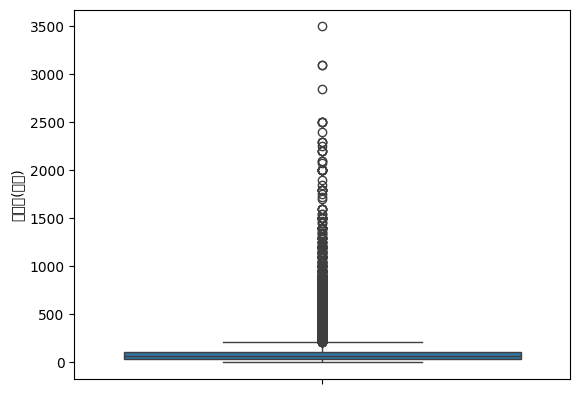

In [ ]:
import seaborn as sns
sns.boxplot(com['월세금(만원)'])

In [ ]:
com['월부담액'] = com['보증금(만원)']*0.04/12+com['월세금(만원)']

In [ ]:
print(f"5년 이하 평균 월세가격 평균 : {com[(com['계약개월수']<=60)]['월세금(만원)'].mean()}")
print(f"5년 초과 평균 월세가격 평균 : {com[(com['계약개월수']>60)]['월세금(만원)'].mean()}")

5년 이하 평균 월세가격 평균 : 93.8044355167965
5년 초과 평균 월세가격 평균 : 109.95


In [ ]:
com['월부담액'] = com['보증금(만원)']*0.04/12+com['월세금(만원)']

In [ ]:
com[['월세금(만원)','월부담액']].describe()

,월세금(만원),월부담액
count,122474.000000,122474.000000
mean,93.816263,139.218405
std,109.803801,138.546048
min,1.000000,3.000000
25%,39.000000,64.333333
50%,65.000000,91.666667
75%,110.000000,161.666667
max,3500.000000,3511.666667


In [ ]:
# com.drop('계약기간',axis=1, inplace=True)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


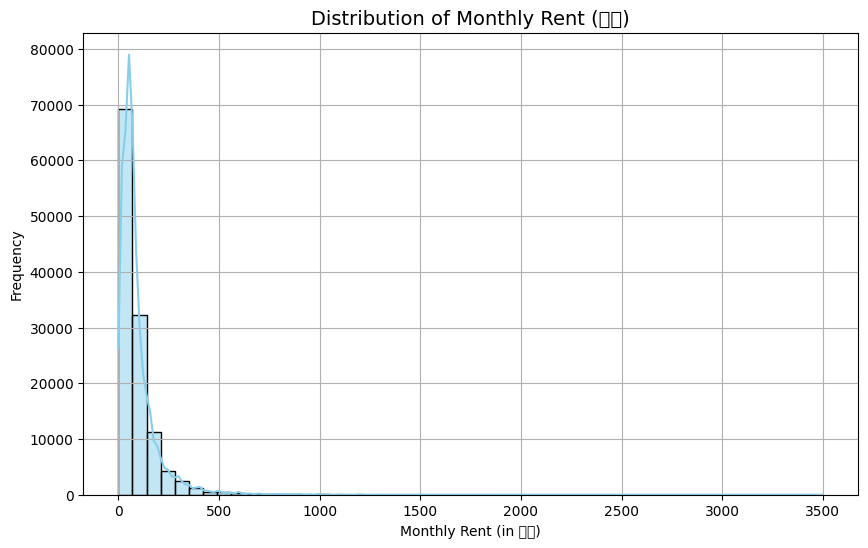

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(com['월세금(만원)'], bins=50, kde=True, color='skyblue')

plt.title("Distribution of Monthly Rent (만원)", fontsize=14)
plt.xlabel("Monthly Rent (in 만원)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 5년을 기준으로 월세금 분포확인

<ipython-input-73-852eac7c68df>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_5years_or_less.dropna(), data_over_5years.dropna()],


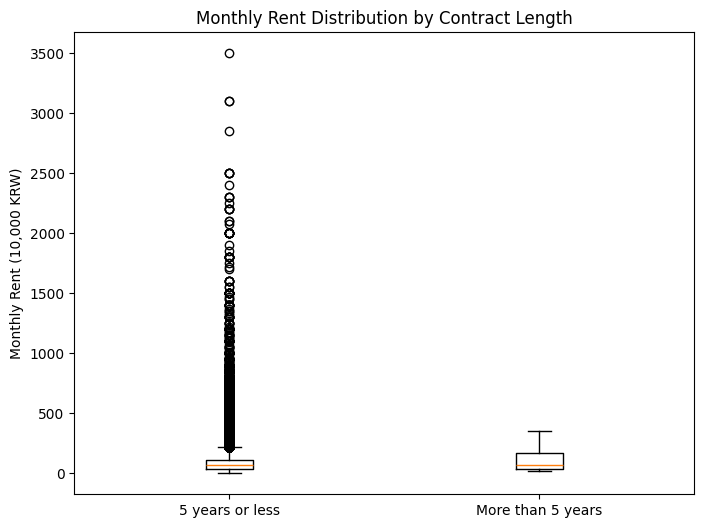

In [ ]:
import matplotlib.pyplot as plt

data_5years_or_less = com[com['계약개월수'] <= 60]['월세금(만원)']
data_over_5years = com[com['계약개월수'] > 60]['월세금(만원)']

plt.figure(figsize=(8,6))
plt.boxplot([data_5years_or_less.dropna(), data_over_5years.dropna()],
            labels=['5 years or less', 'More than 5 years'])
plt.title('Monthly Rent Distribution by Contract Length')
plt.ylabel('Monthly Rent (10,000 KRW)')
plt.show()

In [ ]:
from google.colab import userdata
KAKAO_REST_API_KEY = userdata.get('KAKAO_REST_API_KEY')

In [ ]:
import requests
import pandas as pd
import time

def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_REST_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            location = result['documents'][0]['address']
            return float(location['y']), float(location['x'])  # 위도, 경도
    return None, None

# 1. 고유한 도로명 주소 리스트 추출
unique_addresses = com['도로명'].dropna().unique()

# 2. 주소별 위도/경도 저장 딕셔너리
address_to_latlng = {}

for addr in unique_addresses:
    lat, lng = get_lat_lng(addr)
    address_to_latlng[addr] = (lat, lng)
    time.sleep(0.2)  # API 과다 호출 방지

# 3. 원래 데이터프레임에 위도/경도 추가
com['위도'] = com['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
com['경도'] = com['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
com.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '시', '구', '동', '계약년', '계약월', '계약시작', '계약종료', '시작연',
       '시작월', '종료연', '종료월', '계약개월수', '월부담액', '위도', '경도'],
      dtype='object')

In [ ]:
com.drop(['계약시작','계약종료','시'],axis=1, inplace=True)

In [ ]:
com[['월세금(만원)','월부담액']].describe()

In [ ]:
# com.drop('계약기간',axis=1, inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df[df['위도'].isna()]['도로명']

In [ ]:
from google.colab import userdata
KAKAO_REST_API_KEY = userdata.get('KAKAO_REST_API_KEY')

In [ ]:
df_no = pd.DataFrame(df[df['위도'].isna()]['도로명'])

In [ ]:
import requests
import pandas as pd
import time


def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_REST_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            location = result['documents'][0]['address']
            return float(location['y']), float(location['x'])  # 위도, 경도
    return None, None

# 1. 고유한 도로명 주소 리스트 추출
unique_addresses = df_no['도로명'].unique()

# 2. 주소별 위도/경도 저장 딕셔너리
address_to_latlng = {}

for addr in unique_addresses:
    lat, lng = get_lat_lng(addr)
    address_to_latlng[addr] = (lat, lng)
    time.sleep(0.2)  # API 과다 호출 방지

# 3. 원래 데이터프레임에 위도/경도 추가
df_no['위도'] = df_no['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
df_no['경도'] = df_no['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
df_no[(df_no['위도'].notnull())&(df_no['경도'].notnull())]

In [ ]:
# 위도와 경도가 모두 존재하는 행만 필터링
filtered_df = df_no[(df_no['위도'].notnull()) & (df_no['경도'].notnull())]

# 딕셔너리 생성: {'도로명': (위도, 경도)}
location_dict = dict(zip(filtered_df['도로명'], zip(filtered_df['위도'], filtered_df['경도'])))

In [ ]:
# 위도 또는 경도가 NaN인 행의 인덱스를 찾기
mask = df['위도'].isna() | df['경도'].isna()

# 해당 행에 대해서만 도로명 기준으로 위도, 경도 값 업데이트
df.loc[mask, '위도'] = df.loc[mask, '도로명'].map(lambda x: location_dict.get(x, (None, None))[0])
df.loc[mask, '경도'] = df.loc[mask, '도로명'].map(lambda x: location_dict.get(x, (None, None))[1])

In [ ]:
df = df[(df['위도'].notnull())|(df['경도'].notnull())]

In [ ]:
df.to_csv("/content/drive/MyDrive/DataMining/term project/data/OG/전처리_위경도추가.csv",index=False)

### 보증금, 월세 시각화

<Axes: xlabel='보증금(만원)', ylabel='월세금(만원)'>

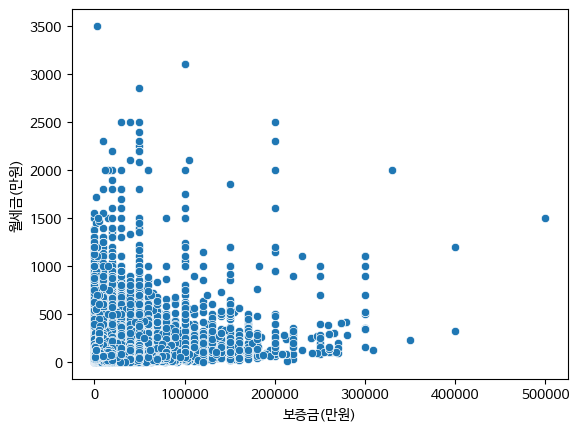

In [ ]:
import seaborn as sns
sns.scatterplot(x = df['보증금(만원)'],y=df['월세금(만원)'])

<Axes: xlabel='보증금(만원)', ylabel='월세금(만원)'>

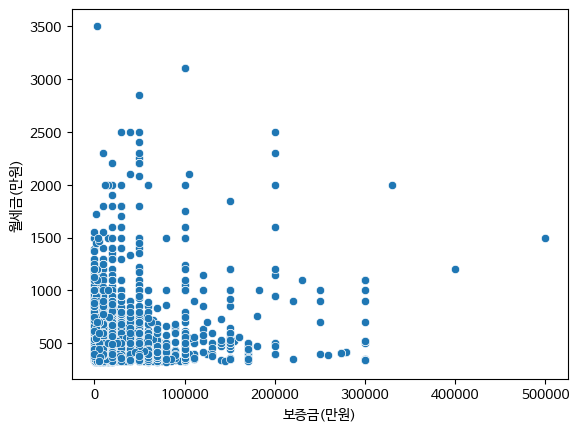

In [ ]:
df_ma = df[df['월세금(만원)']>320]
sns.scatterplot(x = df_ma['보증금(만원)'],y=df_ma['월세금(만원)'])

<Axes: xlabel='보증금(만원)', ylabel='월세금(만원)'>

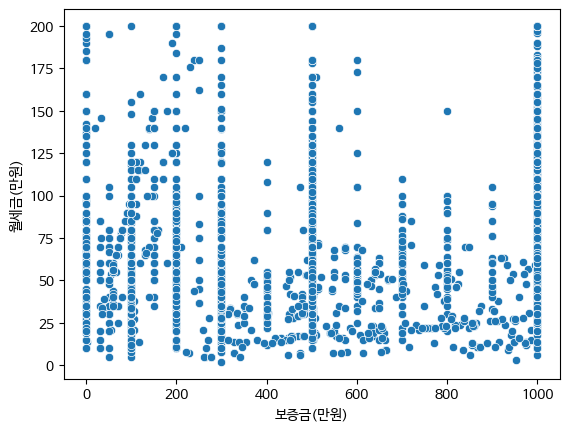

In [ ]:
df_ma = df00[(df00['월세금(만원)']<=200)&(df00['보증금(만원)']<=1000)]
sns.scatterplot(x = df_ma['보증금(만원)'],y=df_ma['월세금(만원)'])

<Axes: xlabel='보증금(만원)', ylabel='월세금(만원)'>

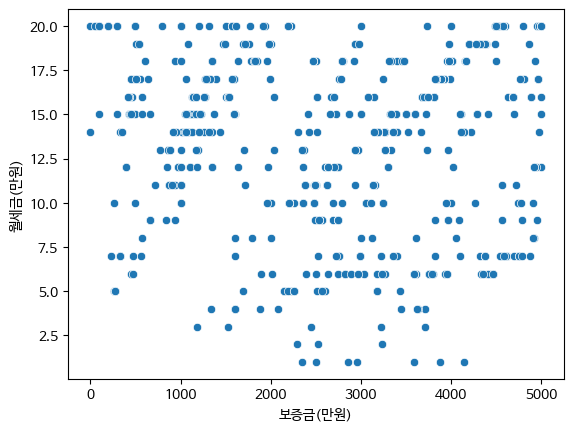

In [ ]:
df_ma = df00[(df00['월세금(만원)']<=20)&(df00['보증금(만원)']<=5000)&(df00['주택유형']=='아파트')]
sns.scatterplot(x = df_ma['보증금(만원)'],y=df_ma['월세금(만원)'])

### ```월세금(만원)<=20``` 이고 ```보증금(만원)<=5000```, 아파트인 경우

In [ ]:
df_masked = df00[(df00['월세금(만원)']<=20)&(df00['보증금(만원)']<=5000)&(df00['주택유형']=='아파트')]
df_masked.head()

In [ ]:
df_inv_masked = df00[(df00['월세금(만원)']>20)&(df00['보증금(만원)']>5000)&(df00['주택유형']=='아파트')]
df_inv_masked.head()

In [ ]:
print(df_masked['보증금/월세금'].mean())
print(df_inv_masked['보증금/월세금'].mean())

274.32932205305883
322.3135131098503


In [ ]:
print(df_masked['월세금/면적'].mean())
print(df_inv_masked['월세금/면적'].mean())

2.39842050209205
0.710383178124444


In [ ]:
print(df_masked['월부담액'].mean())
print(df_inv_masked['월부담액'].mean())

23.271108786610878
263.4117429859422


In [ ]:
df_m = df00[(df00['월세금(만원)']<=20)&(df00['보증금(만원)']<=5000)]
df_i_m = df00[(df00['월세금(만원)']>20)&(df00['보증금(만원)']>5000)]

In [ ]:
print(df_m['보증금/월세금'].mean())
print(df_i_m['보증금/월세금'].mean())
print('--------------')
print(df_m['월세금/면적'].mean())
print(df_i_m['월세금/면적'].mean())
print('--------------')
print(df_m['월부담액'].mean())
print(df_i_m['월부담액'].mean())

262.79815915658605
341.9816865122673
--------------
2.7043925831202045
0.7961570434820063
--------------
22.7753452685422
220.42504662632183


### 이름으로 공공임대주택 필터링 시도

In [ ]:
df[df['건물명'].str.lower().str.contains('lh|sh', na=False)]['건물명'].unique()

array(['LH서울잠실행복주택', 'LH수서2단지아파트', 'LH서울양원1단지', 'DasHaus', 'SH대치1단지아파트',
       '불광SH빌', '당산SHVILLE', 'SH하우스', 'JSHAUS', 'BETHELHOUSE', '희망(WISH)',
       'BLESSHOME', "Mook'sHAUS(52-17)", 'WISH희망', 'LaHShouse',
       'SH초행지붕-화곡', 'TJSH', 'HillHouse', 'SH팰리스', 'GardenHealsHouse',
       'GreenhillHouse', 'J/SHome', 'sheeltower', 'LH석촌도시형생활주택',
       'HILLHOUSE1', 'shinehouse', 'PhilHeim', 'ImmanuelHouse', 'SH스카이',
       'LH(179-2)', '청담ShineVille', 'PLUSHOUSE'], dtype=object)

In [ ]:
lh_sh_list = ['LH서울잠실행복주택', 'LH수서2단지아파트', 'LH서울양원1단지', 'SH대치1단지아파트',
       '불광SH빌', '당산SHVILLE', 'SH하우스',
       'SH초행지붕-화곡', 'SH팰리스','J/SHome', 'LH석촌도시형생활주택', 'ImmanuelHouse',
       'LH(179-2)']

In [2]:
df00['월부담액'] = df00['월부담액'].round(2)
df00['보증금/월세금'] = df00['보증금(만원)']/df00['월세금(만원)']
df00['보증금/월세금'].round(2)
df00['면적/월세금'] = df00['전용면적(㎡)']/df00['월세금(만원)']
df00['면적/월세금'] = df00['면적/월세금'].round(2)

NameError: name 'df00' is not defined

In [ ]:
df00['월세금/면적'] = df00['월세금(만원)']/df00['전용면적(㎡)']
df00['월세금/면적'] = df00['면적/월세금'].round(2)
df00.drop(['면적/월세금'],axis=1,inplace=True)

>>

# 지하철, 병원 위치 데이터를 이용하여 각 매물당 주변 개수 컬럼생성

### og_hos_pre, og_hos데이터 확인
### 역개수 추가 데이터 확인
### 식당, 병원, 파출소 데이터 확인
----------
### 병원 좌표계 위경도로 변경 후 BallTree알고리즘을 통해 매물의 위경도를 통해 거리 계산후 기준거리내 병원 개수 컬럼 생성

In [ ]:
import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/OG/og_hos.csv")
# hos_pre = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/OG/hos_pre.csv")
# rest = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/07_24_01_P_관광식당.xlsx")
pol = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/경찰청_전국 지구대 파출소 주소 현황_20231231.csv", encoding='cp949')
sub = pd.read_csv('/content/drive/MyDrive/DataMining/term project/data/추가 데이터/역 개수 추가.csv')
# ne_hos = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/01_01_01_P_병원.xlsx")

In [ ]:
pop = pd.read_csv(
    "/content/drive/MyDrive/DataMining/term project/data/추가 데이터/201_DT_201003_A010006_20250525211807.csv",
    engine='python',         # 유연한 파서
    encoding='utf-8-sig',    # 혹은 'cp949', 파일 인코딩에 맞게 변경
    on_bad_lines='skip'      # 문제 있는 줄 건너뜀 (기존 error_bad_lines=False 대체)
)
\

In [ ]:
hos_loc = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/서울시 병의원 위치 정보.csv",encoding='cp949')
hos_loc.isna().sum()

In [ ]:
print(hos_loc['병원분류명'].unique())

['의원' '병원' '치과의원' '한방병원' '한의원' '치과병원' '요양병원' '종합병원' '기타' '보건소' '기타(구급차)']


In [ ]:
df.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '구', '동', '계약년', '계약월', '시작연', '시작월', '종료연', '종료월',
       '계약개월수', '월부담액', '위도', '경도', '보증금/월세금', '월세금/면적', '병원_1km내_개수',
       '병원_3km내_개수', '병원_10km내_개수'],
      dtype='object')

In [ ]:
len(df)

122435

In [ ]:
len(sub)

122435

In [ ]:
sub.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '구', '동', '계약년', '계약월', '시작연', '시작월', '종료연', '종료월',
       '계약개월수', '월부담액', '위도', '경도', '보증금/월세금', '월세금/면적', '500m_이내_역_개수',
       '1km_이내_역_개수'],
      dtype='object')

In [ ]:
df00 = sub.copy()

In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

# 위경도 → 라디안 변환 (Haversine 거리 계산을 위해)
def to_radians(df, lat_col='위도', lon_col='경도'):
    return np.radians(df[[lat_col, lon_col]].values)

# 1km, 3km, 10km를 라디안으로 변환 (지구 반지름 약 6371km 기준)
radius_km = [0.2, 0.5, 1]
radii = [r / 6371.0 for r in radius_km]

# 매물 위치, 병원 위치를 라디안으로 변환
df00_rad = to_radians(df00, '위도', '경도')
hos00_rad = to_radians(hos_loc, '병원위도', '병원경도')

# BallTree 생성 (Haversine metric 사용)
tree = BallTree(hos00_rad, metric='haversine')

# 매물별 거리 내 병원 개수 계산
for r, km in zip(radii, radius_km):
    count = tree.query_radius(df00_rad, r=r, count_only=True)
    df00[f'병원_{km}km내_개수'] = count

In [ ]:
df00.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '구', '동', '계약년', '계약월', '시작연', '시작월', '종료연', '종료월',
       '계약개월수', '월부담액', '위도', '경도', '보증금/월세금', '월세금/면적', '병원_1km내_개수',
       '병원_3km내_개수', '병원_10km내_개수', '500m_이내_역_개수', '1km_이내_역_개수',
       '병원_0.2km내_개수', '병원_0.5km내_개수'],
      dtype='object')

In [ ]:
df00.drop(['병원_0km내_개수','병원_5km내_개수'],axis=1)

# 음식점 데이터 전처러
### 개방자치단체코드를 이용해 서울만 선택
### 여러 컬럼 제거
### 좌표정보, 도로명전체주소 둘다 없으면 drop
### 도로명전체주소 컬럼으로 좌표정보 추출
### 좌표정보 추출안된 200여개의 행 제거

In [ ]:
re = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/fulldata_07_24_04_P_ Ϲ       .csv",encoding='cp949')

<ipython-input-39-ce1154073808>:1: DtypeWarning: Columns (11,39,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  re = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/fulldata_07_24_04_P_ Ϲ       .csv",encoding='cp949')


In [ ]:
re['영업상태명'].unique()

array(['폐업', '영업/정상'], dtype=object)

In [ ]:
re = re[re['영업상태명']=='영업/정상']

In [ ]:
re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688154 entries, 1517800 to 2205953
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   번호               688154 non-null  int64  
 1   개방서비스명           688154 non-null  object 
 2   개방서비스아이디         688154 non-null  object 
 3   개방자치단체코드         688154 non-null  int64  
 4   관리번호             688154 non-null  object 
 5   인허가일자            688150 non-null  object 
 6   인허가취소일자          0 non-null       float64
 7   영업상태구분코드         688154 non-null  int64  
 8   영업상태명            688154 non-null  object 
 9   상세영업상태코드         688154 non-null  int64  
 10  상세영업상태명          688154 non-null  object 
 11  폐업일자             0 non-null       object 
 12  휴업시작일자           0 non-null       float64
 13  휴업종료일자           0 non-null       float64
 14  재개업일자            0 non-null       float64
 15  소재지전화            349136 non-null  object 
 16  소재지면적            674096 non-null  fl

In [ ]:
re.drop(['번호','개방서비스아이디','관리번호','인허가일자','인허가취소일자','영업상태구분코드',
         '폐업일자','휴업시작일자','재개업일자','소재지전화','소재지우편번호','최종수정시점','데이터갱신구분',
         '데이터갱신일자','업태구분명','위생업태명','남성종사자수','여성종사자수','영업장주변구분명','등급구분명',
         '급수시설구분명','총직원수','본사직원수','공장사무직직원수','공장판매직직원수','공장생산직직원수','건물소유구분명',
         '보증액','월세액','다중이용업소여부','시설총규모','전통업소지정번호','전통업소주된음식','홈페이지','Unnamed: 47'],axis=1, inplace=True)

In [ ]:
re.isna().sum()

,0
개방서비스명,0
개방자치단체코드,0
영업상태명,0
상세영업상태코드,0
상세영업상태명,0
휴업종료일자,688154
소재지면적,14058
소재지전체주소,1266
도로명전체주소,5759
도로명우편번호,13752


In [ ]:
seoul_sigungu_codes = [
    3000000, 3010000, 3020000, 3030000, 3040000,
    3050000, 3060000, 3070000, 3080000, 3090000,
    3100000, 3110000, 3120000, 3130000, 3140000,
    3150000, 3160000, 3170000, 3180000, 3190000,
    3200000, 3210000, 3220000, 3230000, 3240000
]
# 해당 코드만 포함된 행만 필터링
df_filtered = re[re['개방자치단체코드'].isin(seoul_sigungu_codes)].copy()

# 결과 확인
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 122808 entries, 1517825 to 2195085
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   개방서비스명           122808 non-null  object 
 1   개방자치단체코드         122808 non-null  int64  
 2   영업상태명            122808 non-null  object 
 3   상세영업상태코드         122808 non-null  int64  
 4   상세영업상태명          122808 non-null  object 
 5   휴업종료일자           0 non-null       float64
 6   소재지면적            119589 non-null  float64
 7   소재지전체주소          122747 non-null  object 
 8   도로명전체주소          121768 non-null  object 
 9   도로명우편번호          121285 non-null  float64
 10  사업장명             122807 non-null  object 
 11  좌표정보x(epsg5174)  121257 non-null  float64
 12  좌표정보y(epsg5174)  121257 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 13.1+ MB
None


In [ ]:
df_filtered.isna().sum()

,0
개방서비스명,0
개방자치단체코드,0
영업상태명,0
상세영업상태코드,0
상세영업상태명,0
휴업종료일자,122808
소재지면적,3219
소재지전체주소,61
도로명전체주소,1040
도로명우편번호,1523


In [ ]:
len(df_filtered)

122808

In [ ]:
df_filtered = df_filtered.dropna(subset=['좌표정보x(epsg5174)','좌표정보y(epsg5174)', '도로명전체주소'], how='all')
print(len(df_filtered))

122356


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 좌표가 결측이 아닌 행만 선택
df_valid_coords = df_filtered.dropna(subset=['좌표정보x(epsg5174)', '좌표정보y(epsg5174)'])

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(
    df_valid_coords,
    geometry=gpd.points_from_xy(df_valid_coords['좌표정보x(epsg5174)'], df_valid_coords['좌표정보y(epsg5174)']),
    crs='EPSG:5174'  # 원래 좌표계 (TM 중부 원점 기준)
)

# WGS84 (위경도)로 변환
gdf = gdf.to_crs(epsg=4326)

# 위도와 경도 컬럼 생성
df_filtered.loc[gdf.index, '경도'] = gdf.geometry.x
df_filtered.loc[gdf.index, '위도'] = gdf.geometry.y

In [ ]:
loc_list = df_filtered[(df_filtered['좌표정보x(epsg5174)'].isna())]['도로명전체주소'].to_list()

In [ ]:
from google.colab import userdata
KAKAO_REST_API_KEY = userdata.get('KAKAO_REST_API_KEY')

In [ ]:
import requests
import pandas as pd
import time


def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_REST_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            location = result['documents'][0]['address']
            return float(location['y']), float(location['x'])  # 위도, 경도
    return None, None


# 2. 주소별 위도/경도 저장 딕셔너리
address_to_latlng = {}

for addr in loc_list:
    lat, lng = get_lat_lng(addr)
    address_to_latlng[addr] = (lat, lng)
    time.sleep(0.2)  # API 과다 호출 방지

df_filtered['위도'] = df_filtered['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
df_filtered['경도'] = df_filtered['도로명'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
add_dict = address_to_latlng

In [ ]:
count = sum(1 for v in address_to_latlng.values() if v == (None, None))
print(count)


193


In [ ]:
df_filtered['위도'] = df_filtered['도로명전체주소'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
df_filtered['경도'] = df_filtered['도로명전체주소'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
co = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/[붙임1] 지방행정인허가데이터개방_자치단체코드목록.xlsx")

In [ ]:
co.head()

,번호,시도명,시도(자치단체)코드,시군구명,시군구(자치단체)코드
0,1,서울특별시,6110000.0,종로구,3000000.0
1,2,NaN,NaN,중구,3010000.0
2,3,NaN,NaN,용산구,3020000.0
3,4,NaN,NaN,성동구,3030000.0
4,5,NaN,NaN,광진구,3040000.0


In [ ]:
df_filtered.isna().sum()

,0
개방서비스명,0
개방자치단체코드,0
영업상태명,0
상세영업상태코드,0
상세영업상태명,0
휴업종료일자,122158
소재지면적,3004
소재지전체주소,60
도로명전체주소,588
도로명우편번호,929


In [ ]:
df_filtered = df_filtered[df_filtered['위도'].notnull()]

In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

# 위경도 → 라디안 변환 (Haversine 거리 계산을 위해)
def to_radians(df, lat_col='위도', lon_col='경도'):
    return np.radians(df[[lat_col, lon_col]].values)

# 1km, 3km, 10km를 라디안으로 변환 (지구 반지름 약 6371km 기준)
radius_km = [0.2, 0.5, 1]
radii = [r / 6371.0 for r in radius_km]

# 매물 위치, 병원 위치를 라디안으로 변환
df00_rad = to_radians(df00, '위도', '경도')
rest00_rad = to_radians(df_filtered, '위도', '경도')

# BallTree 생성 (Haversine metric 사용)
tree = BallTree(rest00_rad, metric='haversine')

# 매물별 거리 내 병원 개수 계산
for r, km in zip(radii, radius_km):
    count = tree.query_radius(df00_rad, r=r, count_only=True)
    df00[f'식당_{km}km내_개수'] = count

# 지구대/파출소 데이터 통합

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/output/OG_hos_sub_rest_merged.csv")
park = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/주요 공원 추가.csv")

In [ ]:
df00 = df.copy()
df00[['공원_300m_이내_개수', '공원_500m_이내_개수', '공원_800m_이내_개수']] = park[['공원_300m_이내_개수', '공원_500m_이내_개수', '공원_800m_이내_개수']]

In [ ]:
df00.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '구', '동', '계약년', '계약월', '시작연', '시작월', '종료연', '종료월',
       '계약개월수', '월부담액', '위도', '경도', '보증금/월세금', '월세금/면적', '병원_1km내_개수',
       '병원_3km내_개수', '병원_10km내_개수', '500m_이내_역_개수', '1km_이내_역_개수',
       '병원_0.2km내_개수', '병원_0.5km내_개수', '식당_0.2km내_개수', '식당_0.5km내_개수',
       '식당_1km내_개수', '공원_300m_이내_개수', '공원_500m_이내_개수', '공원_800m_이내_개수'],
      dtype='object')

In [ ]:
pop.head()

,동별,연령별,항목,단위,2024. 4/4,2025. 1/4,Unnamed: 6
0,사직동,합계,계,NaN,9208,9177,NaN
1,사직동,합계,한국인,NaN,8962,8937,NaN
2,사직동,합계,등록외국인,NaN,246,240,NaN
3,사직동,0~4세,계,NaN,163,155,NaN
4,사직동,0~4세,한국인,NaN,157,150,NaN


In [ ]:
pol.head()

,연번,시도청,경찰서,관서명,구분,주소
0,1,서울청,서울중부,을지,지구대,서울특별시 중구 을지로 234
1,2,서울청,서울중부,광희,지구대,서울특별시 중구 퇴계로 375-1
2,3,서울청,서울중부,약수,지구대,"서울특별시 중구 동호로 5길 15, 약수지구대"
3,4,서울청,서울중부,신당,파출소,"서울특별시 중구 다산로 248 (신당동, 신당파출소)"
4,5,서울청,서울중부,장충,파출소,서울특별시 중구 동호로 261


In [ ]:
len(df00['동'].unique())

370

In [ ]:
len(pop['동별'].unique())

425

### 지구대 위치데이터 위경도 추출

In [ ]:
len(pol)

2051

In [ ]:
len(pol['주소'].unique())

2049

In [ ]:
pol['주소'].value_counts()

In [ ]:
pol = pol[pol['시도청']=='서울청']
print(len(pol))

243


In [ ]:
from google.colab import userdata
KAKAO_REST_API_KEY = userdata.get('KAKAO_REST_API_KEY')

In [ ]:
import requests
import pandas as pd
import time


def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_REST_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            location = result['documents'][0]['address']
            return float(location['y']), float(location['x'])  # 위도, 경도
    return None, None

loc_list = pol['주소'].unique()37.67945, 127.0434
# 2. 주소별 위도/경도 저장 딕셔너리
address_to_latlng = {}

for addr in loc_list:
    lat, lng = get_lat_lng(addr)
    address_to_latlng[addr] = (lat, lng)
    time.sleep(0.2)  # API 과다 호출 방지

pol['위도'] = pol['주소'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
pol['경도'] = pol['주소'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
pol.isna().sum()

,0
연번,0
시도청,0
경찰서,0
관서명,0
구분,0
주소,0
위도,2
경도,2


### API를 통해서 구하지 못한 정보는 구글맵에서 직접 추출

In [ ]:
pol[pol['위도'].isna()]

,연번,시도청,경찰서,관서명,구분,주소,위도,경도
161,162,서울청,서울강서,염창,지구대,서울특별시 강서구 공항대로59다길 80,NaN,NaN
233,234,서울청,서울도봉,도봉1,파출소,서울특별시 도봉구 도봉로169길 43 도봉1파출소,NaN,NaN


In [ ]:
pol.loc[pol['관서명']=='염창','위도']=37.55525
pol.loc[pol['관서명']=='염창','경도']=126.8715
pol.loc[pol['관서명']=='도봉1','위도']=37.67945
pol.loc[pol['관서명']=='도봉1','경도']=127.0434

In [ ]:
pol.isna().sum()

,0
연번,0
시도청,0
경찰서,0
관서명,0
구분,0
주소,0
위도,0
경도,0


In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

# 위경도 → 라디안 변환 (Haversine 거리 계산을 위해)
def to_radians(df, lat_col='위도', lon_col='경도'):
    return np.radians(df[[lat_col, lon_col]].values)

# 1km, 3km, 10km를 라디안으로 변환 (지구 반지름 약 6371km 기준)
radius_km = [0.5, 1, 3]
radii = [r / 6371.0 for r in radius_km]

# 매물 위치, 병원 위치를 라디안으로 변환
df00_rad = to_radians(df00, '위도', '경도')
rest00_rad = to_radians(pol, '위도', '경도')

# BallTree 생성 (Haversine metric 사용)
tree = BallTree(rest00_rad, metric='haversine')

# 매물별 거리 내 병원 개수 계산
for r, km in zip(radii, radius_km):
    count = tree.query_radius(df00_rad, r=r, count_only=True)
    df00[f'파출소/지구대_{km}km내_개수'] = count

# 등록인구통계 데이터와 통합하기 위해 행정동, 법정동 컬럼을 생성
### 매물별 위경도를 기준으로 행정동,법정동을 선정
### 등록인구통계 데이터와 동이름이 다른 경우도 정렬(ex '금호2·3가동'='금호2.3가동')

In [ ]:
hang = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/행정동_KIKcd_H.20250513.xlsx")
hang.head()

,행정동코드,시도명,시군구명,읍면동명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,20081101,NaN
3,1111053000,서울특별시,종로구,사직동,19880423,NaN
4,1111054000,서울특별시,종로구,삼청동,19880423,NaN


In [ ]:
bub = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/법정동KIKcd_B.20250513.xlsx")
bub.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [ ]:
dong = pd.read_excel("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/동_통합KIKmix.20250513.xlsx")
dong.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [ ]:
print(len(df00['동'].unique()))

370


### 인구수 데이터 통합

In [ ]:
hang = hang[hang['시도명']=='서울특별시']
bub = bub[bub['시도명']=='서울특별시']
dong = dong[dong['시도명']=='서울특별시']

In [ ]:
print(len(hang))
print(len(bub))
print(len(dong))

3915
20565
21808


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# prepare and read data
F1 = '/content/drive/MyDrive/DataMining/term project/data/sig_20230729.zip (Unzipped Files)/sig.shp'
D1 = gpd.read_file(F1, encoding='cp949')
D1.head()

In [ ]:
# prepare and read data
F1 = '/content/drive/MyDrive/DataMining/term project/data/emd.shp'
gdf = gpd.read_file(F1, encoding='cp949')
# 2. EPSG:5179 좌표계로 가정하고 명시적으로 설정 (중부원점 기준)
gdf.set_crs(epsg=5179, inplace=True)

# 3. 위경도 좌표계 (WGS84: EPSG:4326)로 변환
gdf = gdf.to_crs(epsg=4326)
gdf.head()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# 1. df00에 위도(latitude), 경도(longitude) 컬럼이 있다고 가정
# 예: df00['위도'], df00['경도']

# 2. .shp 파일을 GeoDataFrame으로 불러오기
gdf = gpd.read_file("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/행정동_KIKcd_H.20250513.shp")

# 3. df00의 위경도를 Point geometry로 변환
df00['geometry'] = df00.apply(lambda row: Point(row['경도'], row['위도']), axis=1)

# 4. df00을 GeoDataFrame으로 변환 (좌표계는 위경도: WGS84, EPSG:4326)
gdf00 = gpd.GeoDataFrame(df00, geometry='geometry', crs='EPSG:4326')

# 5. 좌표계 통일 (shp파일의 좌표계 확인 후 변환)
# shp 파일이 일반적으로 TM 좌표계인 경우 (예: EPSG:5179)
gdf = gdf.to_crs(epsg=4326)

# 6. spatial join 수행 (포인트가 어떤 폴리곤에 속하는지 찾기)
joined = gpd.sjoin(gdf00, gdf[['EMD_KOR_NM', 'geometry']], how='left', predicate='within')

# 7. 법정동 컬럼 대체
df00['법정동'] = joined['EMD_KOR_NM']

In [ ]:
df00['법정동']

In [ ]:
# prepare and read data
F1 = '/content/drive/MyDrive/DataMining/term project/data/BND_ADM_DONG_PG.shp'
gdf = gpd.read_file(F1, encoding='cp949')
# 2. EPSG:5179 좌표계로 가정하고 명시적으로 설정 (중부원점 기준)
# gdf.set_crs(epsg=5179, inplace=True)

# 3. 위경도 좌표계 (WGS84: EPSG:4326)로 변환
gdf = gdf.to_crs(epsg=4326)
gdf.head()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# # 1. 행정동 GeoDataFrame 불러오기
F1 = '/content/drive/MyDrive/DataMining/term project/data/BND_ADM_DONG_PG.shp'
gdf = gpd.read_file(F1, encoding='cp949')
# 2. EPSG:5179 좌표계로 가정하고 명시적으로 설정 (중부원점 기준)
# gdf.set_crs(epsg=5179, inplace=True)

# 3. 위경도 좌표계 (WGS84: EPSG:4326)로 변환
gdf = gdf.to_crs(epsg=4326)

# 2. df00: 위경도 기반 매물 데이터 (예: 'lon', 'lat' 컬럼 있음)
# 매물 포인트로 변환
df00['geometry'] = df00.apply(lambda row: Point(row['경도'], row['위도']), axis=1)
gdf_points = gpd.GeoDataFrame(df00, geometry='geometry', crs='EPSG:4326')  # 위경도는 EPSG:4326

# 3. 좌표계 맞추기 (행정동 데이터에 맞추어 변환)
# gdf_points = gdf_points.to_crs(epsg=5181)

# 4. 공간 조인: 어떤 동의 폴리곤에 포함되는지 계산
joined = gpd.sjoin(gdf_points, gdf[['ADM_NM', 'geometry']], how='left', predicate='within')

# 5. 결과: joined['ADM_NM'] 이 해당 매물의 행정동 이름
# 원래 df00에 컬럼 추가
df00['행정동'] = joined['ADM_NM']

In [ ]:
ha_arr = df00['행정동'].unique()

In [ ]:
# 1. 필요한 열만 선택해서 dong 데이터 정리
dong_subset = dong[["동리명", "읍면동명", "행정동코드", "법정동코드"]].copy()

# 2. 컬럼명 변경 (merge 후 바로 df00에 들어가게끔)
dong_subset = dong_subset.rename(columns={
    "동리명": "법정동",        # df00의 '법정동' 컬럼과 맞추기
    "읍면동명": "행정동명",
    "행정동코드": "행정동코드",
    "법정동코드": "법정동코드"
})

# 3. 병합 (left join: df00 기준)
df00 = df00.merge(dong_subset, on="법정동", how="left")

In [ ]:
# 차집합 구하기: 전체에서 target_dongs에 없는 동만 추출
difference = np.setdiff1d(pop_dong,ha_arr)

print(difference)

['금호2.3가동' '면목3.8동' '삼청동' '상계3.4동' '상계6.7동' '종로1.2.3.4가동' '종로5.6가동'
 '중계2.3동']


In [ ]:
df00.loc[df00['행정동']=='금호2·3가동','행정동']='금호2.3가동'
df00.loc[df00['행정동']=='면목3·8동','행정동']='면목3.8동'
df00.loc[df00['행정동']=='상계3·4동','행정동']='상계3.4동'
df00.loc[df00['행정동']=='상계6·7동','행정동']='상계6.7동'
df00.loc[df00['행정동']=='종로1·2·3·4가동','행정동']='종로1.2.3.4가동'
df00.loc[df00['행정동']=='종로5·6가동','행정동']='종로5.6가동'
df00.loc[df00['행정동']=='중계2·3동','행정동']='중계2.3동'

In [ ]:
ha_arr = df00['동별'].unique()
pop_dong = pop['동별'].unique()

In [ ]:
# 차집합 구하기: 전체에서 target_dongs에 없는 동만 추출
difference = np.setdiff1d(ha_arr, pop_dong)

print(difference)

[nan]


In [ ]:
df01.loc[df01['행정동']=='금호2.3가동','행정동']='금호2·3가동'
df01.loc[df01['행정동']=='면목3.8동','행정동']='면목3·8동'
df01.loc[df01['행정동']=='상계3.4동','행정동']='상계3·4동'
df01.loc[df01['행정동']=='상계6.7동','행정동']='상계6·7동'
df01.loc[df01['행정동']=='종로1.2.3.4가동','행정동']='종로1·2·3·4가동'
df01.loc[df01['행정동']=='종로5.6가동','행정동']='종로5·6가동'
df01.loc[df01['행정동']=='중계2.3동','행정동']='중계2·3동'

In [ ]:
# do_list = dong['읍면동명'].unique()
ha_ar = df01['행정동'].unique()
po_dong = pop['동별'].unique()
difference = np.setdiff1d(ha_ar, po_dong)

print(difference)

[]


In [ ]:
pop['2024. 4/4'] = pop['2024. 4/4'].replace('-', 0)
pop['2024. 4/4'] = pop['2024. 4/4'].astype(int)

In [ ]:
# 1. 필요한 컬럼만 추출
df_pop = pop[['동별', '연령별', '항목', '2024. 4/4']].copy()

# 2. 새로운 컬럼명 생성: "연령별_항목" 형태
df_pop['col_name'] = df_pop['연령별'] + '_' + df_pop['항목']

# 3. 피벗: 동별을 인덱스로, 새로운 컬럼명(col_name)을 컬럼으로
df_pivot = df_pop.pivot_table(index='동별', columns='col_name', values='2024. 4/4')

# 4. 컬럼 이름 초기화
df_pivot.reset_index(inplace=True)

# 5. df01에 병합 (동별 기준)
df01 = df01.merge(df_pivot, left_on='행정동', right_on='동별', how='left')


In [ ]:
missing_cols = df01.isna().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

건물명                1
100세 이상_등록외국인    136
dtype: int64


In [ ]:
df00.drop(['행정동명','행정동코드','동별'],axis=1,inplace=True)

### 65세 이상 인구비율
### 외국인 인구 비율 행정동별 만들기

In [ ]:
population_columns = [
    '0~4세_계', '0~4세_한국인', '0~4세_등록외국인',
    '5~9세_계', '5~9세_한국인', '5~9세_등록외국인',
    '10~14세_계', '10~14세_한국인', '10~14세_등록외국인',
    '15~19세_계', '15~19세_한국인', '15~19세_등록외국인',
    '20~24세_계', '20~24세_한국인', '20~24세_등록외국인',
    '25~29세_계', '25~29세_한국인', '25~29세_등록외국인',
    '30~34세_계', '30~34세_한국인', '30~34세_등록외국인',
    '35~39세_계', '35~39세_한국인', '35~39세_등록외국인',
    '40~44세_계', '40~44세_한국인', '40~44세_등록외국인',
    '45~49세_계', '45~49세_한국인', '45~49세_등록외국인',
    '50~54세_계', '50~54세_한국인', '50~54세_등록외국인',
    '55~59세_계', '55~59세_한국인', '55~59세_등록외국인',
    '60~64세_계', '60~64세_한국인', '60~64세_등록외국인',
    '65~69세_계', '65~69세_한국인', '65~69세_등록외국인',
    '70~74세_계', '70~74세_한국인', '70~74세_등록외국인',
    '75~79세_계', '75~79세_한국인', '75~79세_등록외국인',
    '80~84세_계', '80~84세_한국인', '80~84세_등록외국인',
    '85~89세_계', '85~89세_한국인', '85~89세_등록외국인',
    '90~94세_계', '90~94세_한국인', '90~94세_등록외국인',
    '95~99세_계', '95~99세_한국인', '95~99세_등록외국인',
    '100세 이상_계', '100세 이상_한국인', '100세 이상_등록외국인',
    '합계_계', '합계_한국인', '합계_등록외국인'
]
print(len(population_columns))

66


In [ ]:
sep = df00[population_columns]

In [ ]:
df00 = df01.copy()


In [ ]:
# 2. 65세 이상 인구 총합 계산 (계 컬럼 기준)
age_65_plus_cols = [
    '65~69세_계', '70~74세_계', '75~79세_계', '80~84세_계', '85~89세_계',
    '90~94세_계', '95~99세_계', '100세 이상_계'
]
foreigner_col = ['합계_등록외국인']
df00['외국인_비율']= df00[foreigner_col].sum(axis=1)/df01['합계_계']
df00['65세이상_인구비율'] = df00[age_65_plus_cols].sum(axis=1)/df01['합계_계']

In [ ]:
df00.drop(population_columns,axis=1,inplace=True)

In [ ]:
df00.columns

Index(['전월세구분', '전용면적(㎡)', '계약일', '보증금(만원)', '월세금(만원)', '층', '건축년도', '도로명',
       '주택유형', '건물명', '구', '동', '계약년', '계약월', '시작연', '시작월', '종료연', '종료월',
       '계약개월수', '월부담액', '위도', '경도', '보증금/월세금', '월세금/면적', '병원_1km내_개수',
       '병원_3km내_개수', '병원_10km내_개수', '500m_이내_역_개수', '1km_이내_역_개수',
       '병원_0.2km내_개수', '병원_0.5km내_개수', '식당_0.2km내_개수', '식당_0.5km내_개수',
       '식당_1km내_개수', '공원_300m_이내_개수', '공원_500m_이내_개수', '공원_800m_이내_개수',
       '파출소/지구대_0.5km내_개수', '파출소/지구대_1km내_개수', '파출소/지구대_3km내_개수', 'geometry',
       '법정동', '법정동코드', '행정동', '동별', '외국인_비율', '65세이상_인구비율'],
      dtype='object')

# 대학교 위치정보 추가

<img src="https://r2cdn.perplexity.ai/pplx-full-logo-primary-dark%402x.png" class="logo" width="120"/>

## 대학 자취방 평균 통학 거리

**요약**
한국 대학생들이 자취를 선택하는 가장 큰 이유는 '원거리 통학' 때문이며, 실제로 대학생의 평균 통학 시간과 거리, 그리고 자취생들의 통학 환경에 대한 다양한 조사 결과가 있습니다.

---

**대학생 평균 통학 시간 및 거리**

- 여러 설문조사에 따르면, 대학생의 평균 통학 시간은 왕복 약 2시간(120분) 내외로 나타납니다.
    - 잡코리아·알바몬 조사: 대학생 평균 통학 시간은 왕복 122분[^1][^7].
    - 수도권 대학생의 경우, 평균 통학 시간은 왕복 135.6분(약 2시간 15분)으로 더 깁니다[^2].
    - 또 다른 조사에서는 통학생의 하루 평균 통학 시간이 왕복 2시간 6분(126분)으로 나타납니다[^5].
- 실제 거리로 환산하면, 수도권 기준으로 15~30km 내외가 일반적이며, 대중교통 환승과 대기 시간 때문에 실제 이동 시간은 거리보다 훨씬 길어집니다[^4].

---

**자취생의 평균 통학 거리**

- 자취생은 대부분 대학 근처(도보 5~20분, 0.5~2km 이내)에 거주하는 경우가 많습니다.
    - 자취를 선택한 주요 이유는 '짧은 통학 거리' 확보(58.1%)로, 실제로 학교 인근 원룸촌이나 오피스텔에 거주하는 경우가 많아 통학 거리가 매우 짧아집니다[^3].
    - 대학가 원룸촌은 대개 캠퍼스에서 200m~1km 이내에 밀집해 있습니다[^3].

---

**통학 거리별 자취 선택 경향**

- 통학 시간이 왕복 2시간(편도 1시간 이상)을 넘길 경우, 자취를 고려하는 학생이 많습니다[^1][^6][^7][^8].
- 실제로 1시간 20분~1시간 30분(편도) 정도면 자취를 고민하는 학생들이 늘어나고, 2시간 이상(왕복 4시간) 통학은 자취 또는 기숙사 생활로 전환하는 경우가 많습니다[^8].

---

**정리**


| 구분 | 평균 통학 시간(왕복) | 평균 통학 거리(편도) | 자취생 통학 거리 |
| :-- | :-- | :-- | :-- |
| 전체 대학생 | 120~135분 | 15~30km | 0.5~2km |
| 수도권 대학생 | 135.6분 | 20~30km | 0.5~2km |
| 자취생 | 10~30분(도보/버스) | 0.5~2km | 0.5~2km |


---

**결론**
대학 자취방(원룸 등)에서 학교까지의 평균 통학 거리는 대체로 0.5~2km 내외(도보 5~20분 거리)로 매우 짧은 편입니다. 반면, 자취를 하지 않고 통학하는 학생들은 왕복 2시간(편도 1시간 내외), 거리로는 15~30km까지 통학하는 경우가 많습니다. 통학 시간이 길수록 자취를 선택하는 비율이 높아집니다[^1][^2][^3][^7].

<div style="text-align: center">⁂</div>

[^1]: https://www.dailypop.kr/news/articleView.html?idxno=48374

[^2]: https://www.20slab.org/Archives/492

[^3]: http://www.gokmu.com/news/article.html?no=16342

[^4]: https://channelpnu.pusan.ac.kr/news/articleView.html?idxno=36707

[^5]: https://www.asiae.co.kr/article/2019030516322254245

[^6]: https://www.dailypop.kr/news/articleView.html?idxno=48492

[^7]: https://www.segye.com/newsView/20170322003591

[^8]: https://www.82cook.com/entiz/read.php?bn=15\&num=3365443

[^9]: https://orbi.kr/0006927224

[^10]: https://blog.naver.com/marko0332/221847527190

In [ ]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/output/A-Z_ratio_drop_pop.csv")
pop = pd.read_csv('/content/drive/MyDrive/DataMining/term project/data/output/pop_sep_fr_A-Z.csv')
col = pd.read_csv("/content/drive/MyDrive/DataMining/term project/data/추가 데이터/전국대학및전문대학정보표준데이터.csv",encoding='cp949')

In [ ]:
col.drop(['학교 영문명','설립형태구분명', '소재지지번주소','도로명우편번호','소재지우편번호','홈페이지주소','대표팩스번호','설립일자','기준연도','데이터기준일자','제공기관코드'],axis=1,inplace=True)

In [ ]:
col.columns

Index(['학교명', '본분교구분명', '대학구분명', '학교구분명', '시도코드', '시도명', '소재지도로명주소', '대표전화번호',
       '제공기관명'],
      dtype='object')

In [ ]:
col.drop(['제공기관명'],axis=1,inplace=True)

In [ ]:
col['uni_name'] = col['학교명'].str.split(expand=True)[0]

In [ ]:
col = col[col['시도명']=='서울특별시']
col.head()

In [ ]:
print(len(col))

564


In [ ]:
# 소재지도로명주소가 중복되지 않는 값만 필터링
unique_address = col['소재지도로명주소'].value_counts()
unique_address = unique_address[unique_address == 1].index

# uni_name과 학교명(예: '학교명' 컬럼)이 같은 행만 필터링
filtered = col[
    (col['소재지도로명주소'].isin(unique_address))
]

print(len(filtered))

58


In [ ]:
print(len(filtered))

17


In [ ]:
col = col[col['uni_name']==col['학교명']]

In [ ]:
print(len(col))
print(len(col['uni_name'].unique()))

67
66


In [ ]:
col[col['소재지도로명주소']=='서울특별시 동작구 흑석로 84 (흑석동, 중앙대학교)']

,학교명,본분교구분명,대학구분명,학교구분명,시도코드,시도명,소재지도로명주소,대표전화번호,uni_name
122,적십자간호대학,본교,전문대학,전문대학,11,서울특별시,"서울특별시 동작구 흑석로 84 (흑석동, 중앙대학교)",02-3700-3632,적십자간호대학
676,중앙대학교,본교,대학,대학교,11,서울특별시,"서울특별시 동작구 흑석로 84 (흑석동, 중앙대학교)",02-820-5114,중앙대학교


In [ ]:
col[col['소재지도로명주소']=='서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)']

,학교명,본분교구분명,대학구분명,학교구분명,시도코드,시도명,소재지도로명주소,대표전화번호,uni_name
589,사이버한국외국어대학교,본교,대학,사이버대학(대학),11,서울특별시,"서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)",02-2173-2580,사이버한국외국어대학교
708,한국외국어대학교,본교,대학,대학교,11,서울특별시,"서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)",02-2173-2114,한국외국어대학교


In [ ]:
# 제외할 학교명 리스트
exclude_names = ['적십자간호대학', '사이버한국외국어대학교']

# 학교명이 위 리스트에 없는 경우만 필터링
col = col[~col['학교명'].isin(exclude_names)]

col['학교명'].value_counts()

In [ ]:
duplicated_uni = col[col.duplicated(subset='uni_name', keep=False)]

print(duplicated_uni)

        학교명 본분교구분명 대학구분명 학교구분명  시도코드    시도명  \
752  가톨릭대학교   제2캠퍼    대학   대학교    11  서울특별시   
753  가톨릭대학교   제3캠퍼    대학   대학교    11  서울특별시   

                                    소재지도로명주소        대표전화번호 uni_name  
752     서울특별시 서초구 반포대로 222 (반포동, 가톨릭대학교성의교정)  02-3147-8114   가톨릭대학교  
753  서울특별시 종로구 창경궁로 296-12 (혜화동, 가톨릭대학교성신교정)   02-740-9705   가톨릭대학교  


In [ ]:
from google.colab import userdata
KAKAO_REST_API_KEY = userdata.get('KAKAO_REST_API_KEY')

In [ ]:
import requests
import pandas as pd
import time


def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_REST_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            location = result['documents'][0]['address']
            return float(location['y']), float(location['x'])  # 위도, 경도
    return None, None

loc_list = col['소재지도로명주소'].unique()
# 2. 주소별 위도/경도 저장 딕셔너리
address_to_latlng = {}

for addr in loc_list:
    lat, lng = get_lat_lng(addr)
    address_to_latlng[addr] = (lat, lng)
    time.sleep(0.2)  # API 과다 호출 방지

col['위도'] = col['소재지도로명주소'].map(lambda x: address_to_latlng.get(x, (None, None))[0])
col['경도'] = col['소재지도로명주소'].map(lambda x: address_to_latlng.get(x, (None, None))[1])

In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

# 위경도 → 라디안 변환 (Haversine 거리 계산을 위해)
def to_radians(df, lat_col='위도', lon_col='경도'):
    return np.radians(df[[lat_col, lon_col]].values)

# 1km, 3km, 10km를 라디안으로 변환 (지구 반지름 약 6371km 기준)
radius_km = [0.2, 0.5, 1,2]
radii = [r / 6371.0 for r in radius_km]

# 매물 위치, 병원 위치를 라디안으로 변환
df00_rad = to_radians(df, '위도', '경도')
hos00_rad = to_radians(col, '위도', '경도')

# BallTree 생성 (Haversine metric 사용)
tree = BallTree(hos00_rad, metric='haversine')

# 매물별 거리 내 병원 개수 계산
for r, km in zip(radii, radius_km):
    count = tree.query_radius(df00_rad, r=r, count_only=True)
    df[f'대학_{km}km내_개수'] = count

In [ ]:
import geopandas as gpd
# prepare and read data
F1 = '/content/drive/MyDrive/DataMining/term project/data/emd.shp'
gdf = gpd.read_file(F1, encoding='cp949')
# 2. EPSG:5179 좌표계로 가정하고 명시적으로 설정 (중부원점 기준)
gdf.set_crs(epsg=5179, inplace=True)

# 3. 위경도 좌표계 (WGS84: EPSG:4326)로 변환
gdf = gdf.to_crs(epsg=4326)
gdf.head()

In [ ]:
# 문자열로 처리하여 분리
gdf['시도코드'] = gdf['EMD_CD'].str.slice(0, 2)
gdf['시군구코드'] = gdf['EMD_CD'].str.slice(2, 5)
gdf['읍면동코드'] = gdf['EMD_CD'].str.slice(5, 8)

display(gdf.head())

In [ ]:
print(len(gdf))

5065


# 동별 매물정도 컬럼생성

In [ ]:
df['주택유형'].unique()

array(['아파트', '연립다세대'], dtype=object)

In [ ]:
counts = df.groupby(['법정동', '주택유형']).size().unstack(fill_value=0)

# 2. 필요한 컬럼 이름 변경 (예: 아파트 → 아파트_거래수)
counts.columns = [col + '_거래수' for col in counts.columns]

# 3. 원래 데이터프레임에 병합 (법정동 기준)
df = df.merge(counts, on='법정동', how='left')

### 자치구 코드 법정동 코드와 위치의 연관성 확인

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EMD_CD      5065 non-null   object  
 1   EMD_ENG_NM  5065 non-null   object  
 2   EMD_KOR_NM  5065 non-null   object  
 3   geometry    5065 non-null   geometry
 4   시도코드        5065 non-null   object  
 5   시군구코드       5065 non-null   object  
 6   읍면동코드       5065 non-null   object  
dtypes: geometry(1), object(6)
memory usage: 277.1+ KB


In [ ]:
print(len(gdf))

5065


In [ ]:
gdf = gdf[gdf['시도코드']=='11']

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


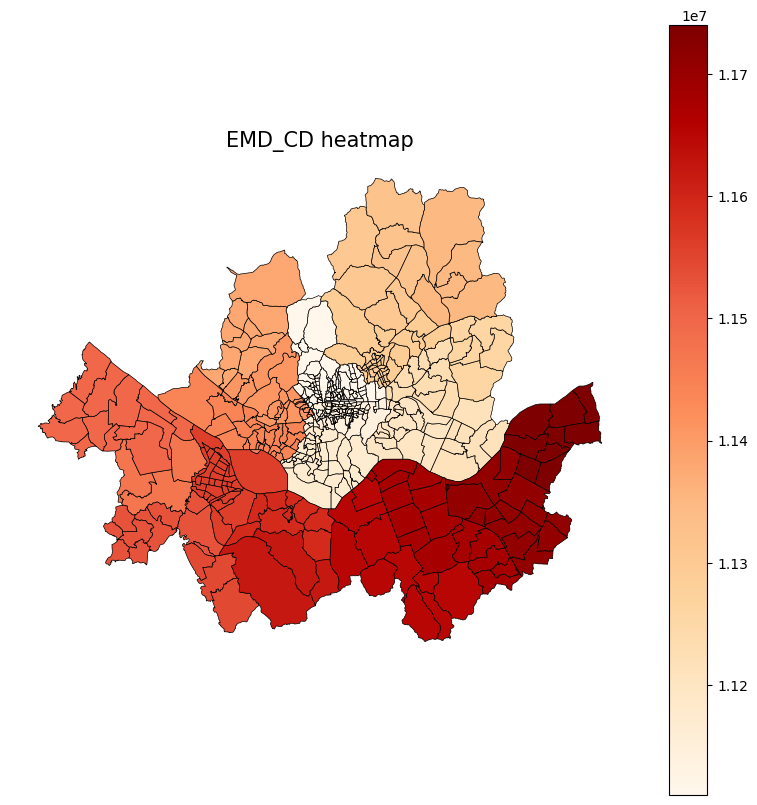

In [ ]:
import matplotlib.pyplot as plt

# 읍면동코드 숫자형으로 변환
gdf['EMD_CD'] = gdf['EMD_CD'].astype(int)

# 히트맵처럼 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    column='EMD_CD',       # 색상 기준 컬럼
    ax=ax,
    cmap='OrRd',              # 히트맵 스타일 컬러맵
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# 시각 설정
ax.set_title("EMD_CD heatmap", fontsize=15)
ax.axis('off')

plt.show()


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


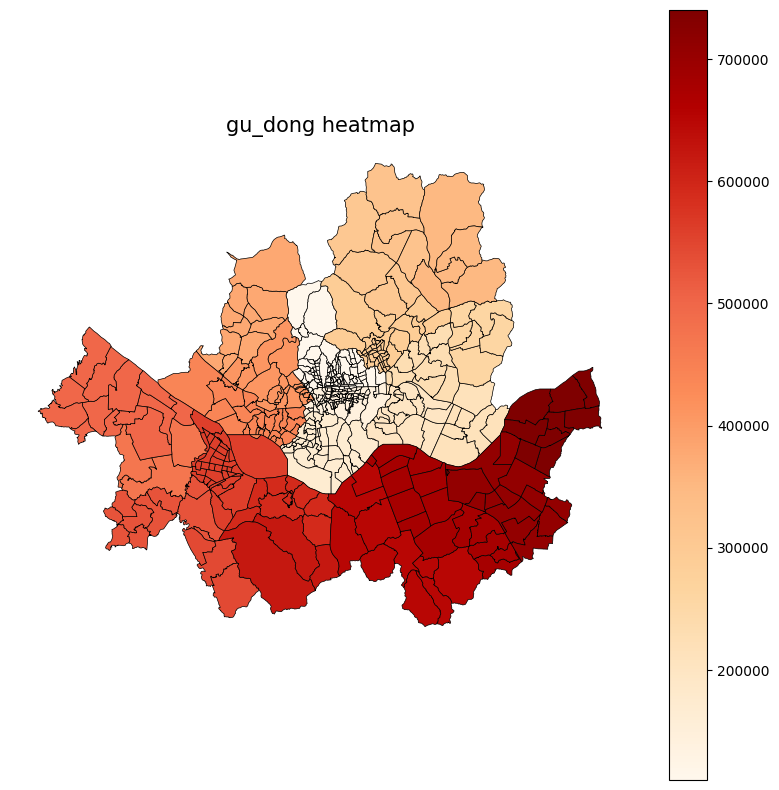

In [ ]:
# 읍면동코드 숫자형으로 변환
gdf['시군구동'] = gdf['시군구코드']+gdf['읍면동코드'].astype(str)
gdf['시군구동'] = gdf['시군구동'].astype(int)

# 히트맵처럼 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    column='시군구동',       # 색상 기준 컬럼
    ax=ax,
    cmap='OrRd',              # 히트맵 스타일 컬러맵
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# 시각 설정
ax.set_title("gu_dong heatmap", fontsize=15)
ax.axis('off')

plt.show()

![종로](https://mblogthumb-phinf.pstatic.net/MjAyMTA2MjVfNjMg/MDAxNjI0NjMxMTY2NzY2.m0-_83YGWrx2FmFVNF7RwUmQq4Wdpmx8VrhS-XR33o4g.f0n6Iv0qQbDT8bc8SH9GsnZmpSZGcCj1E8YVAifTysgg.JPEG.kodoc1/rs1800%EC%84%9C%EC%9A%B8_%EA%B0%81%EA%B5%AC_%EB%AA%A8%EC%96%91-%EB%8F%84%EC%8B%AC%EA%B6%8C-%ED%94%84%EB%9E%80%EC%AF%94%EC%97%AC%EC%A7%80%EB%8F%84008.JPG?type=w800)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


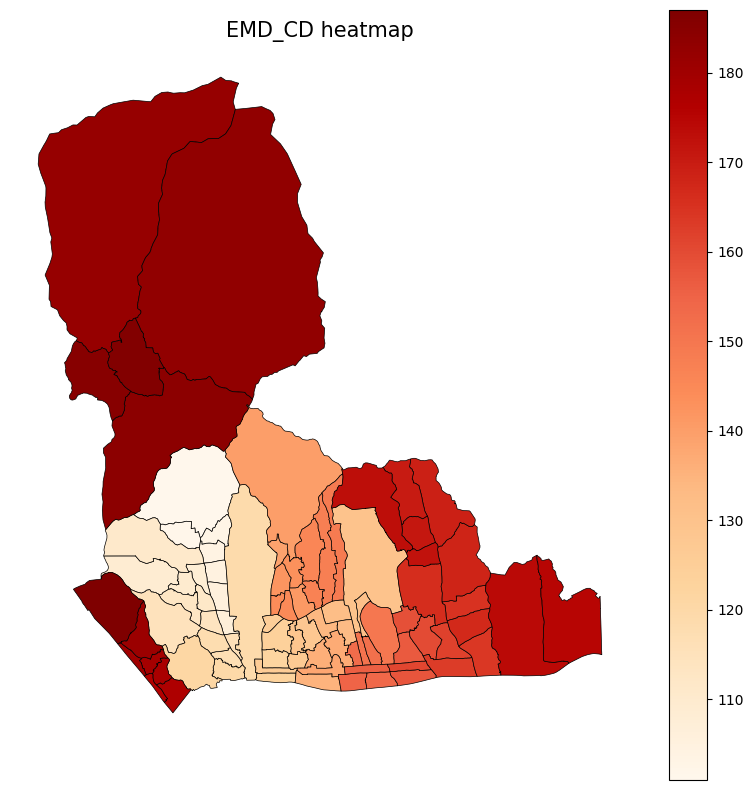

In [ ]:
import matplotlib.pyplot as plt

# 읍면동코드 숫자형으로 변환
gdf['EMD_CD'] = gdf['EMD_CD'].astype(int)
gdf00 = gdf[gdf['시군구코드']==gdf['시군구코드'].unique()[0]]
# 히트맵처럼 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf00.plot(
    column='읍면동코드',       # 색상 기준 컬럼
    ax=ax,
    cmap='OrRd',              # 히트맵 스타일 컬러맵
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# 시각 설정
ax.set_title("EMD_CD heatmap", fontsize=15)
ax.axis('off')

plt.show()


# 인구분포관련 추가 컬럼생성

In [ ]:
counts = df.groupby(['법정동', '주택유형']).size().unstack(fill_value=0)

# 2. 필요한 컬럼 이름 변경 (예: 아파트 → 아파트_거래수)
counts.columns = [col + '_거래수' for col in counts.columns]

# 3. 원래 데이터프레임에 병합 (법정동 기준)
df = df.merge(counts, on='법정동', how='left')

In [ ]:
# 연령대별 합 계산
pop['0-19대인구'] = pop[['0~4세_계', '5~9세_계', '10~14세_계', '15~19세_계']].sum(axis=1)
pop['20-34대인구'] = pop[['20~24세_계', '25~29세_계', '30~34세_계']].sum(axis=1)
pop['35-64대인구'] = pop[['35~39세_계', '40~44세_계', '45~49세_계', '50~54세_계', '55~59세_계', '60~64세_계']].sum(axis=1)

# 비율 계산
pop['0-19대인구비'] = pop['0-19대인구'] / pop['합계_계']
pop['20-34대인구비'] = pop['20-34대인구'] / pop['합계_계']
pop['35-64대인구비'] = pop['35-64대인구'] / pop['합계_계']

# 필요 없으면 중간 컬럼 삭제
pop.drop(columns=['0-19대인구', '20-34대인구', '35-64대인구'], inplace=True)

In [ ]:
df[['0-19대인구비','20-34대인구비','35-64대인구비']] = pop[['0-19대인구비','20-34대인구비','35-64대인구비']]